
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

INTEGRANTES: GENOLET, ZAPATA, GUEDEZ, MANTOVANI. GRUPO 23





---
## Trabajo práctico entregable - Parte 1

In [ ]:
import io
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import pandas as pd
import seaborn

seaborn.set_context('notebook')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

In [ ]:
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO']

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [ ]:
df.tools_programming_languages[:3]

0                     Ninguno
1    HTML, Javascript, Python
2                     Ninguno
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [ ]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
0,ninguno,Ninguno,43000.0,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,[ninguno]


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [ ]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:10]

,language,frequency
0,javascript,2513
1,sql,2154
2,html,1861
3,python,1475
4,java,1453
5,css,1247
6,bash/shell,993
7,php,891
8,.net,823
9,typescript,779


## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [ ]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
interesting_languages = ["Python"]
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages


# Ejercicio 2 - Densidades y varias varialbes

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




RESPUESTA:
Las herramientas utilizadas pueden ser graficos, con los cuales podemos observar la distribucion de las observaciones, y en caso que existieran, valores extremos (outliers). 
Para variables categoricas, el crosstab es una buena medida para analizar el comportamiento ya que CROSSTAB agrupa registros que tienen la misma combinación de valores en dos o más campos o de caracteres.
Por otro lado, las variables numericas podrian ser analizadas con histogramas o graficos de densidad para poder determinar el comportamientos de las observaciones. Mas alla de los medios visuales propuestos. Siempre es recomendable verificar la dependencia de variables con medidas estadisticas tales como la covarianza o el coeficiente de correlacion, el cual es una excelente medida de relacion LINEAL. 

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
original_df = pd.read_csv(url)

In [ ]:
print("Las variables totales del data set son:\n{}".format(original_df.columns.values))

Las variables totales del data set son:
['profile_gender' 'profile_age' 'work_country' 'work_province'
 'profile_years_experience' 'work_years_in_company'
 'work_years_in_current_position' 'work_people_in_charge_of'
 'profile_studies_level' 'profile_studies_level_state' 'profile_career'
 'profile_university' 'profile_specialization_courses'
 'profile_open_source_contributions' 'profile_programming_as_hobby'
 'work_role' 'tools_platform' 'tools_programming_languages'
 'tools_frameworks' 'tools_data_bases' 'tools_qa_testing' 'tools_IDEs'
 'tools_work_pc_os' 'tools_cellphone_os' 'work_on_call_duty'
 'salary_on_call_duty_charge' 'work_on_call_duty_charge_type'
 'work_contract_type' 'salary_monthly_BRUTO' 'salary_monthly_NETO'
 'salary_in_usd' 'salary_satisfaction' 'salary_comparison_last_semester'
 'salary_has_bonus' 'salary_bonus_tied_to'
 'salary_inflation_adjustment_2020'
 'salary_percentage_inflation_adjustment_2020'
 'salary_month_last_inflation_adjustment' 'work_has_violence_situatio

In [ ]:
variables = ['profile_gender','profile_studies_level','salary_monthly_BRUTO', 'salary_monthly_NETO', 'profile_years_experience']

df = original_df[variables]
df.head(20)

,profile_gender,profile_studies_level,salary_monthly_BRUTO,salary_monthly_NETO,profile_years_experience
0,Mujer,Universitario,53000.0,43000.0,3.0
1,Hombre,Universitario,79000.0,63000.0,5.0
2,Mujer,Secundario,160000.0,127000.0,2.0
3,Hombre,Posgrado,130000.0,102000.0,15.0
4,Hombre,Universitario,140000.0,106000.0,9.0
5,Hombre,Terciario,54000.0,44000.0,1.0
6,Hombre,Universitario,75000.0,62400.0,1.0
7,Hombre,Terciario,45000.0,37500.0,0.0
8,Hombre,Universitario,105000.0,75000.0,20.0
9,Otros,Universitario,47000.0,39000.0,20.0


In [ ]:
#CHEQUEO RAPIDO DE LAS MEDIDAS ESTADISTICAS DE LAS VARIABLES NUMERICAS:
df.describe().round()
#En primera medida se observa que la media del salario neto es menor al bruto. Lo cual es logico ya que NETO = BRUTO - APORTES. 
#Por otro lado, la observacion de outliers como sueldos mensuales mayores a 2 millones de pesos o aun mas ilogico, sueldos de $1.
#La cantidad de observaciones NA del salario neto es mayor a la de salario brutos, datos que deberian ser completados con algun criterio.

,salary_monthly_BRUTO,salary_monthly_NETO,profile_years_experience
count,6095.0,5883.0,6095.0
mean,124059.0,94908.0,9.0
std,122912.0,96862.0,7.0
min,1.0,1.0,0.0
25%,61595.0,51480.0,3.0
50%,96000.0,78000.0,7.0
75%,145000.0,106000.0,13.0
max,2180000.0,2080000.0,115.0


In [ ]:
obs = df.shape[0]
print(obs)
#Se observa que la cantidad de observaciones del DF es igual al count de salario bruto y de profile years experience, 
#por lo tanto, no hay valores nulos en dichas variables. 



6095


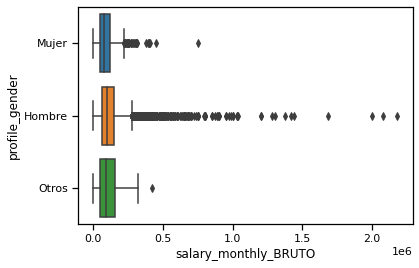

In [ ]:
seaborn.boxplot(data = df, x='salary_monthly_BRUTO', y = 'profile_gender')
plt.show()

En el grafico se observan una gran cantidad de outliers en la variable salario bruto mensual. Los mismos seran eliminados para un mejor analisis. 

In [ ]:
def clean_outliers_sd(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (
        np.abs(interesting_col - interesting_col.mean()) <=
        (2.5 * interesting_col.std()))
    return dataset[mask_outlier]

In [ ]:
df1 = clean_outliers_sd(df, 'salary_monthly_BRUTO')
df2 = clean_outliers_sd(df1, 'salary_monthly_NETO')
dfClean = clean_outliers_sd(df2, 'profile_years_experience')
dfClean.head()

,profile_gender,profile_studies_level,salary_monthly_BRUTO,salary_monthly_NETO,profile_years_experience
0,Mujer,Universitario,53000.0,43000.0,3.0
1,Hombre,Universitario,79000.0,63000.0,5.0
2,Mujer,Secundario,160000.0,127000.0,2.0
3,Hombre,Posgrado,130000.0,102000.0,15.0
4,Hombre,Universitario,140000.0,106000.0,9.0


In [ ]:
dfClean.describe().round()

,salary_monthly_BRUTO,salary_monthly_NETO,profile_years_experience
count,5496.0,5496.0,5496.0
mean,103315.0,79254.0,8.0
std,61128.0,41537.0,6.0
min,1.0,1.0,0.0
25%,60000.0,50000.0,3.0
50%,92000.0,75000.0,7.0
75%,135000.0,100000.0,12.0
max,411000.0,237500.0,26.0


In [ ]:
#Con la funcion para eliminar outliers, se filtraron aquellas observaciones que superan 2,5 veces la desviacion estandar. Sin embargo, 
#continuan valores de salario iguales a 1. Se analizaran aquellos sueldos, tanto brutos y netos por encima de $40.000.

dfClean = dfClean[(dfClean.salary_monthly_BRUTO > 40000) & (dfClean.salary_monthly_NETO > 40000)]
dfClean.describe().round()

,salary_monthly_BRUTO,salary_monthly_NETO,profile_years_experience
count,4547.0,4547.0,4547.0
mean,117137.0,89873.0,9.0
std,56344.0,36714.0,6.0
min,41000.0,40030.0,0.0
25%,75000.0,62000.0,4.0
50%,102000.0,83000.0,8.0
75%,145000.0,107012.0,13.0
max,411000.0,237000.0,26.0


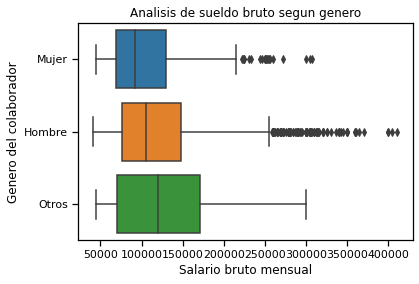

In [ ]:
seaborn.boxplot(data = dfClean, x='salary_monthly_BRUTO', y = 'profile_gender')
plt.title("Analisis de sueldo bruto segun genero")
plt.xlabel("Salario bruto mensual")
plt.ylabel("Genero del colaborador")
plt.show()

En el grafico se puede observar que los hombres cobran valores muy por encima de la media, a diferencia de las mujeres, quienes dificilmente se acercan a valores cercanos a los $400000 

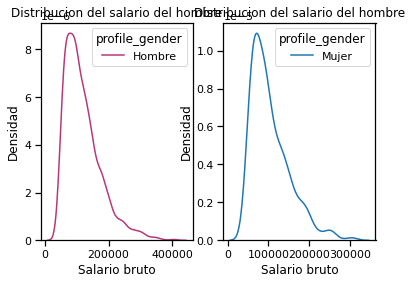

In [ ]:
plt.subplot(1,2,1)
seaborn.kdeplot(data = dfClean[dfClean['profile_gender']== 'Hombre'], x = "salary_monthly_BRUTO",
            hue = "profile_gender", palette = "magma")
plt.title("Distribucion del salario del hombre")
plt.xlabel("Salario bruto")
plt.ylabel("Densidad")

plt.subplot(1,2,2)
seaborn.kdeplot(data = dfClean[dfClean['profile_gender']== 'Mujer'], x = "salary_monthly_BRUTO",
            hue = "profile_gender", color = "blue")
plt.title("Distribucion del salario del hombre")
plt.xlabel("Salario bruto")
plt.ylabel("Densidad")
plt.show()

#VER CON LOS CHICOS, MEJORAR FORMATO

En el grafico se puede observar que la variable "salario bruto" cuenta con una distribucion normal. Tanto para las mujeres coomo para los hombres, en el caso de los hombres, alcanzando valores mayores. 

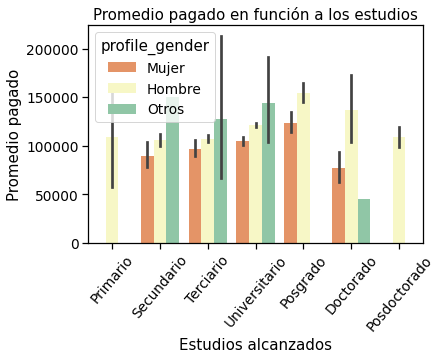

In [ ]:
seaborn.set_context("notebook", font_scale=1.25) #CONSULTAR COMO AGRANDAR LOS GRAFICOS. 

seaborn.barplot(data = dfClean, x = "profile_studies_level", y = "salary_monthly_BRUTO", 
            hue = "profile_gender", palette = "Spectral", order = ["Primario", 'Secundario', 'Terciario', 
                  'Universitario', 'Posgrado', "Doctorado", 'Posdoctorado'])
plt.title("Promedio pagado en función a los estudios")
plt.xlabel("Estudios alcanzados")
plt.xticks(rotation=50)
plt.ylabel("Promedio pagado")
plt.show()

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



Text(-1.1618749999999949, 0.5, 'Salario bruto')

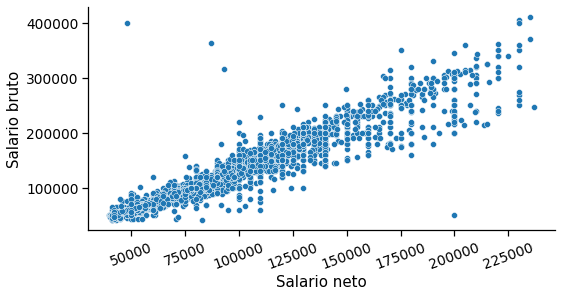

In [ ]:
seaborn.pairplot(data=dfClean, y_vars =['salary_monthly_BRUTO'],
                 x_vars =['salary_monthly_NETO'],
                 aspect=2, height=4)
plt.xticks(rotation=20)
plt.xlabel("Salario neto")
plt.ylabel("Salario bruto")

En el grafico anterior, se puede observar claramente una relacion positiva entre el salario bruto y el salario neto. A medidad que uno aumenta el otro tambien. Mas alla de la visualizazion grafico. Comprobaremos la conclusion con el calculo de la covarianza.

Si la covarianza es mayor a 0. Se verificara la relacion directa entre las variables.

In [ ]:
covarianza = np.cov(dfClean['salary_monthly_BRUTO'], dfClean['salary_monthly_NETO'])[0][1]
if covarianza >0:
  print("La covarianza es igual a {}, al ser mayor a 0, existe una relacion directa entre las variables".format(covarianza))
else:
  print('La covarianza no es igual a 1 por lo tanto no existe relacion directa entra las variables')

La covarianza es igual a 1967651684.6308875, al ser mayor a 0, existe una relacion directa entre las variables


In [ ]:
#OTRA MEDIDA DE RELACION ES EL COEFICIENTE DE CORRELACION, EL CUAL CALCULAREMOS A CONTINUACION PARA PODER INTERPRETARLO. 
coef_corr= np.corrcoef(dfClean['salary_monthly_BRUTO'], dfClean['salary_monthly_NETO'])[0,1]
print('El coeficiente de correlacion de las variables analizadas es igual a:\n', coef_corr)

El coeficiente de correlacion de las variables analizadas es igual a:
 0.9511742740523401


El coeficiente calculado en el codigo de arriba, nos arroja un resultado muy cercano a 1. En el cual podemos interpretar que las variables analizadas tienen una relacion positiva CASI perfecta. Por lo tanto, cuando una variable aumenta, la otra lo hace en una proporcion similar. 

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






In [ ]:
analizedVariables = ['salary_monthly_NETO','profile_studies_level']
dfClean2 = dfClean[analizedVariables]
print(dfClean2.shape)
dfClean2.head(15)

(4547, 2)


,salary_monthly_NETO,profile_studies_level
0,43000.0,Universitario
1,63000.0,Universitario
2,127000.0,Secundario
3,102000.0,Posgrado
4,106000.0,Universitario
5,44000.0,Terciario
6,62400.0,Universitario
8,75000.0,Universitario
11,94621.0,Universitario
12,63000.0,Universitario


In [ ]:
grup = dfClean2.groupby("profile_studies_level").count().round()
print(grup)

# SEPARAR POBLACION ENTRE POST UNIVERSITARIO Y NO. 

                       salary_monthly_NETO
profile_studies_level                     
Doctorado                               21
Posdoctorado                             2
Posgrado                               258
Primario                                 2
Secundario                             307
Terciario                              845
Universitario                         3112


El codigo anterior nos brinda informacion acerca de la distribucion de el nivel de estudio. Decidimos separar la poblacion en 2:


1.   Pre universitarios: Conformado por gente que no finalizo la universidad. Es decir: Primerio, secundario y terciario.
2.   Post universitario: De universitario en adelante. 



In [ ]:
PreUniversitary = ['Primario', 'Secundario', 'Terciario']

In [ ]:
DfPreU = dfClean2[dfClean2['profile_studies_level'].isin(PreUniversitary)]

DfPostU = dfClean2[~dfClean2['profile_studies_level'].isin(PreUniversitary)]

In [ ]:
print(round(DfPreU.describe(), 0))

       salary_monthly_NETO
count               1154.0
mean               83285.0
std                34920.0
min                40030.0
25%                58000.0
50%                75000.0
75%                99000.0
max               230000.0


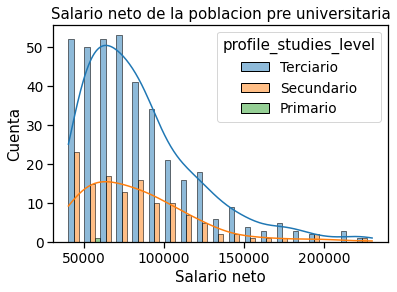

<Figure size 432000x432000 with 0 Axes>

In [ ]:
#Histogramas de las 2 subpoblaciones. 
seaborn.histplot(data = DfPreU.sample(500), x= 'salary_monthly_NETO', stat='count', hue= 'profile_studies_level', multiple = 'dodge', binwidth= 10000,
                 kde = True)
plt.title("Salario neto de la poblacion pre universitaria")
plt.xlabel("Salario neto")
plt.ylabel("Cuenta")
plt.figure(figsize = (6000,6000))
plt.show()

In [ ]:
print(round(DfPostU.describe(), 0))

       salary_monthly_NETO
count               3393.0
mean               92113.0
std                37044.0
min                40250.0
25%                65000.0
50%                85000.0
75%               110000.0
max               237000.0


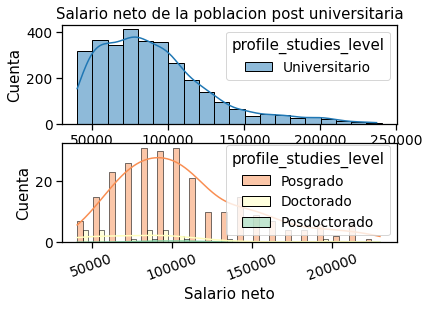

In [ ]:
#Histogramas de las 2 subpoblaciones. 
#EN EL SEGUNDO GRAFICO DISTINGUIMOS UNIVERSITARIOS CON POS UNIVERSITARIOS PARA UN MEJOR ANALISIS.
plt.subplot(2,1,1)

seaborn.histplot(data = DfPostU[DfPostU['profile_studies_level'] == "Universitario"], x= 'salary_monthly_NETO', stat='count', hue= 'profile_studies_level', multiple = 'dodge', binwidth= 10000,
                 kde = True)
plt.title("Salario neto de la poblacion post universitaria")
plt.xlabel("Salario neto")
plt.ylabel("Cuenta")
plt.xticks(rotation=0)

plt.subplot(2,1,2)

seaborn.histplot(data = DfPostU[DfPostU['profile_studies_level'] != "Universitario"], x= 'salary_monthly_NETO', stat='count', hue= 'profile_studies_level', multiple = 'dodge', binwidth= 10000,
                 kde = True, palette = 'Spectral')
plt.xticks(rotation=20)
plt.xlabel("Salario neto")
plt.ylabel("Cuenta")

plt.show()

Como se puede observar con los graficos y con la media de ambas subpoblaciones (83285 para los pre universitarios y 92113 para los post universitarios). Tener mayor nivel de estudios implica mejor sueldo en la actividad profesional. 

## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


In [ ]:
dfClean.columns.values

array(['profile_gender', 'profile_studies_level', 'salary_monthly_BRUTO',
       'salary_monthly_NETO', 'profile_years_experience'], dtype=object)

In [ ]:
variables_analizadas = ['salary_monthly_NETO', 'profile_years_experience','profile_gender']

In [ ]:
new_df = dfClean[variables_analizadas]

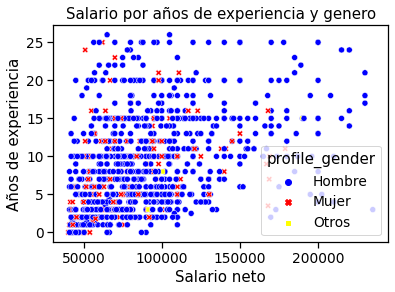

<Figure size 432000x432000 with 0 Axes>

In [ ]:
seaborn.scatterplot(data = dfClean.sample(1000), x = "salary_monthly_NETO", y = "profile_years_experience", 
                hue = "profile_gender", palette = ["blue", "red", 'yellow'],
                style = "profile_gender")
plt.title("Salario por años de experiencia y genero")
plt.xlabel("Salario neto")
plt.ylabel("Años de experiencia")
plt.figure(figsize = (6000,6000))
plt.show()